In [4]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
DiamondpricesData=pd.read_csv('D:/KISHAN COLLAGE/all projects/Diamond Price Prediction/PROJECT DATA SET.csv', encoding='latin')

print('Shape before deleting duplicate values:', DiamondpricesData.shape)

# Removing duplicate rows if any
DiamondpricesData=DiamondpricesData.drop_duplicates()
print('Shape After deleting duplicate values:', DiamondpricesData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
DiamondpricesData.head(10)

Shape before deleting duplicate values: (53940, 10)
Shape After deleting duplicate values: (53794, 10)


,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


<AxesSubplot:>

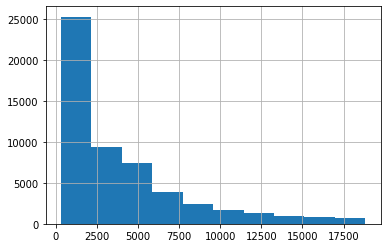

In [6]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
DiamondpricesData['price'].hist()

In [7]:
# Looking at sample rows in the data
DiamondpricesData.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [8]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
DiamondpricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53794 non-null  int64  
 1   carat    53794 non-null  float64
 2   cut      53794 non-null  object 
 3   color    53788 non-null  object 
 4   clarity  53794 non-null  object 
 5   depth    53780 non-null  float64
 6   table    53794 non-null  float64
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
# Looking at the descriptive statistics of the data
DiamondpricesData.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53794.000000,53794.00000,53794,53788,53794,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11256,13032,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,NaN,NaN,NaN,1.429948,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


In [10]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
DiamondpricesData.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

In [11]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    # %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

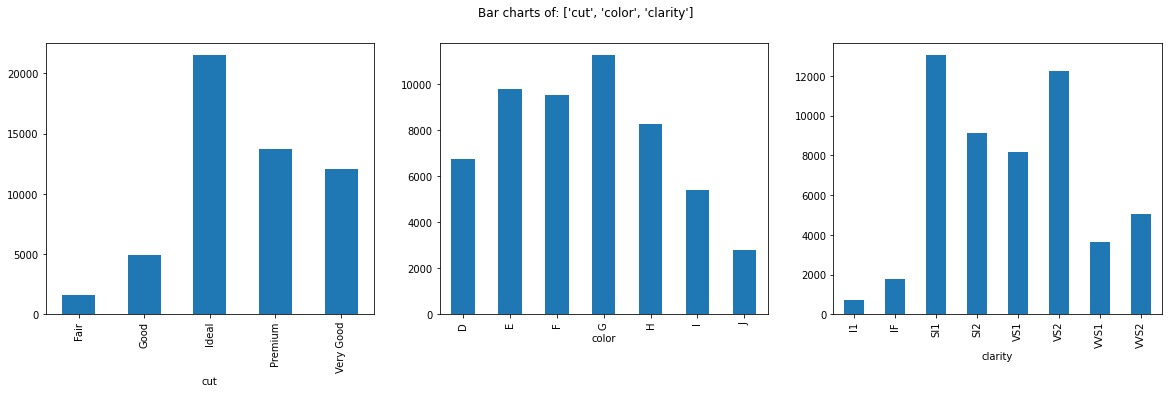

In [12]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=DiamondpricesData, colsToPlot=['cut', 'color', 'clarity'])

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

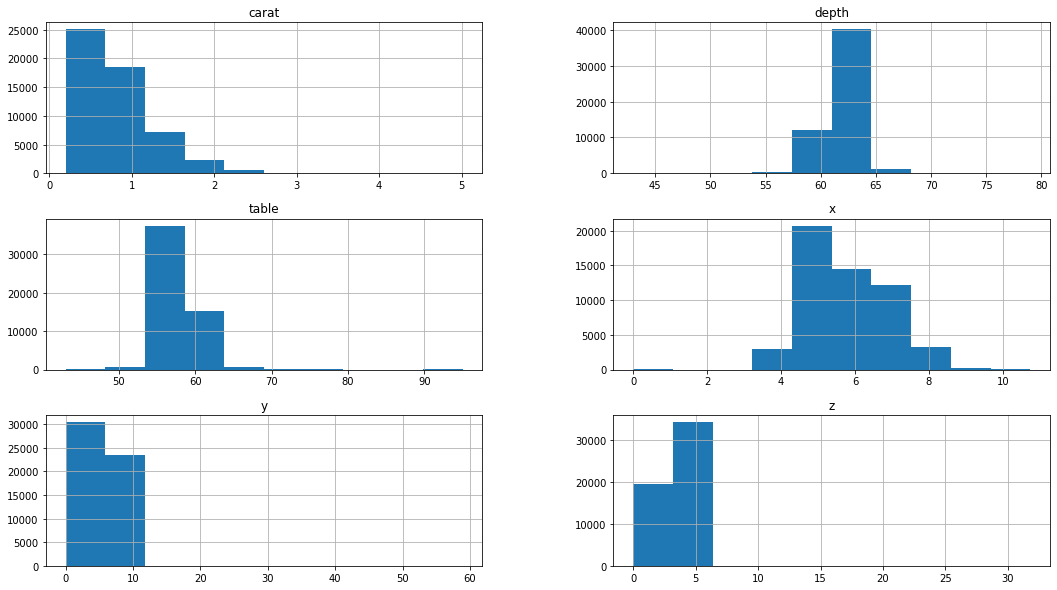

In [13]:
# Plotting histograms of multiple columns together
DiamondpricesData.hist(['carat', 'depth', 'table', 'x','y','z'], figsize=(18,10))

In [14]:
# Finding nearest values to 2 mark
DiamondpricesData['x'][DiamondpricesData['x']>2].sort_values(ascending=True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53787, dtype: float64

In [15]:
# Replacing outliers with nearest possibe value
DiamondpricesData['x'][DiamondpricesData['x']<3.73] =3.73

In [16]:
# Finding nearest values to 20 mark
DiamondpricesData['y'][DiamondpricesData['y']<20].sort_values(ascending=False)

27415    10.54
27630    10.16
25998    10.10
26444     9.94
25999     9.94
         ...  
26243     0.00
11963     0.00
24520     0.00
15951     0.00
49556     0.00
Name: y, Length: 53792, dtype: float64

In [17]:
# Replacing outliers with nearest possibe value
DiamondpricesData['y'][DiamondpricesData['y']>20] =10.54

In [18]:
# Finding nearest values to 10 mark
DiamondpricesData['z'][DiamondpricesData['z']<10].sort_values(ascending=False)

24067    8.06
27415    6.98
27630    6.72
27130    6.43
23644    6.38
         ... 
49556    0.00
4791     0.00
26123    0.00
5471     0.00
13601    0.00
Name: z, Length: 53793, dtype: float64

In [19]:
# Replacing outliers with nearest possibe value
DiamondpricesData['z'][DiamondpricesData['z']>8] =6.98

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

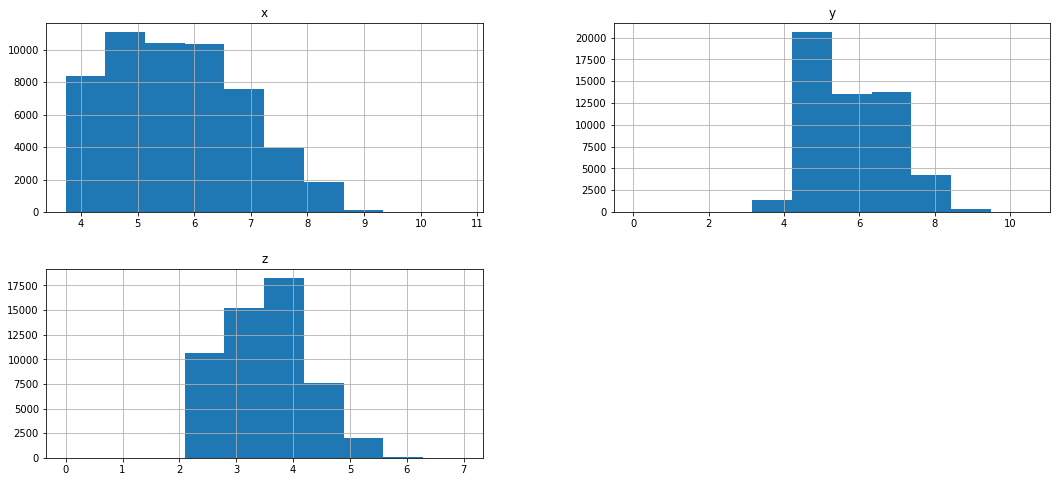

In [20]:
# Plotting the histogram
DiamondpricesData.hist(['x','y', 'z'], figsize=(18,8))

In [21]:
# Finding nearest value beyond 2
DiamondpricesData['y'][DiamondpricesData['y']>2].sort_values(ascending=True)

31600     3.68
31596     3.71
31598     3.71
31601     3.72
31599     3.73
         ...  
25998    10.10
27630    10.16
27415    10.54
49189    10.54
24067    10.54
Name: y, Length: 53788, dtype: float64

In [22]:
# Replacing outliers with nearest possibe value
DiamondpricesData['y'][DiamondpricesData['y']<2] =3.68

In [23]:
# Finding nearest value beyond 2
DiamondpricesData['z'][DiamondpricesData['z']>2].sort_values(ascending=True)

39246    2.06
31592    2.24
47138    2.25
31591    2.26
14       2.27
         ... 
27130    6.43
27630    6.72
24067    6.98
27415    6.98
48410    6.98
Name: z, Length: 53772, dtype: float64

In [24]:
# Replacing outliers with nearest possibe value
DiamondpricesData['z'][DiamondpricesData['z']<2] =2.06

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

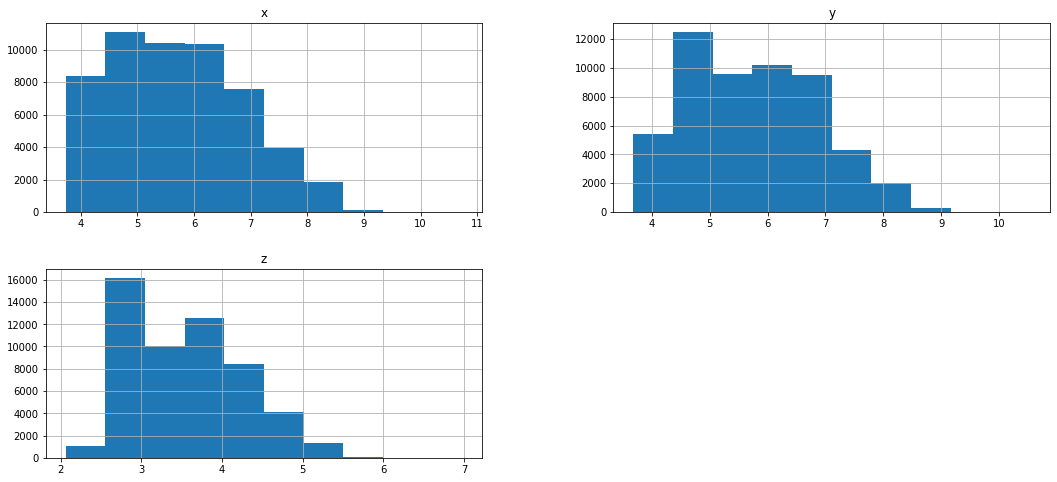

In [25]:
# Plotting the histogram
DiamondpricesData.hist(['x','y', 'z'], figsize=(18,8))

In [26]:
# Finding how many missing values are there for each column
DiamondpricesData.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [27]:
# Replacing missing value for categorical data using MODE value
DiamondpricesData['color'].fillna(value=DiamondpricesData['color'].mode()[0], inplace=True)

In [28]:
# Replacing missing value for continuous data using median value
DiamondpricesData['depth'].fillna(value=DiamondpricesData['depth'].median(), inplace=True)

In [29]:
# Checking missing values again after treatment
DiamondpricesData.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

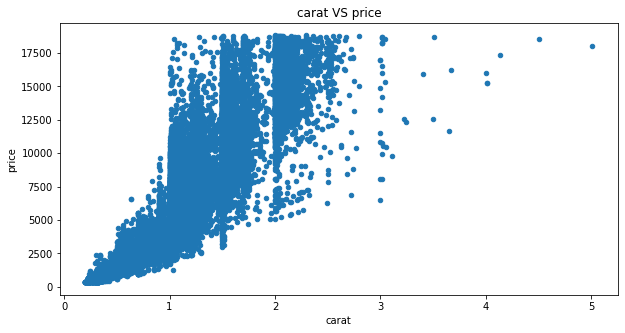

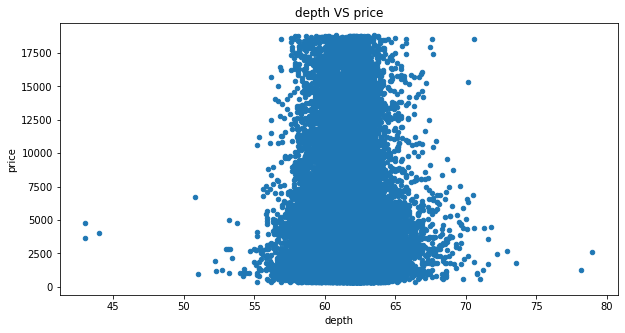

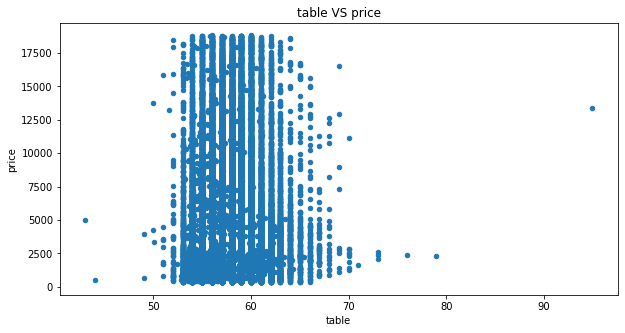

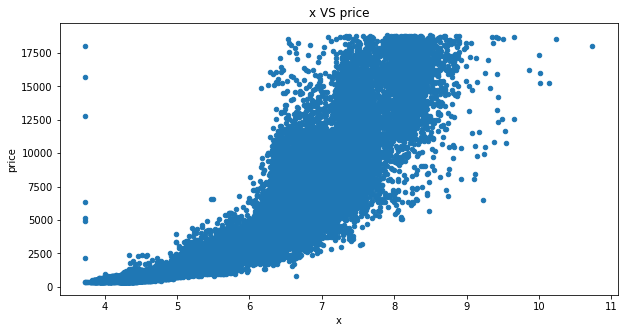

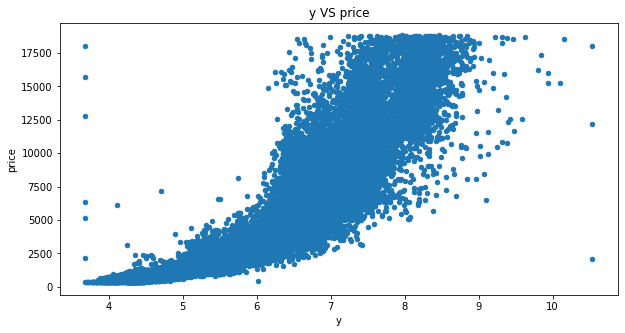

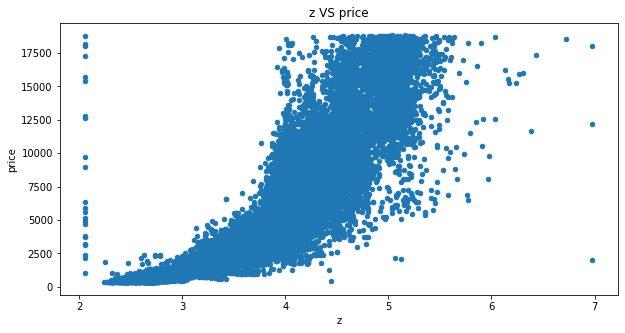

In [30]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    DiamondpricesData.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

In [31]:
# Creating a data filter to remove outliers from data
DataFilter=(DiamondpricesData['z']>2.06) & (DiamondpricesData['z']<6.5)
DiamondpricesData=DiamondpricesData[DataFilter]

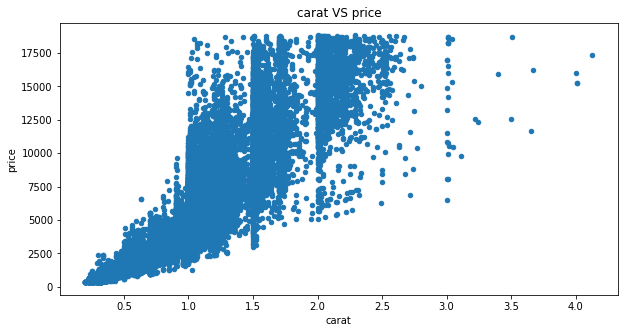

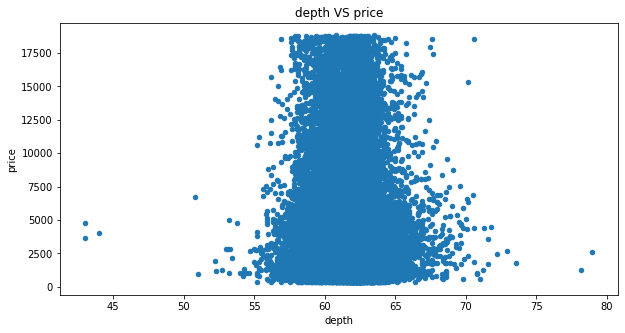

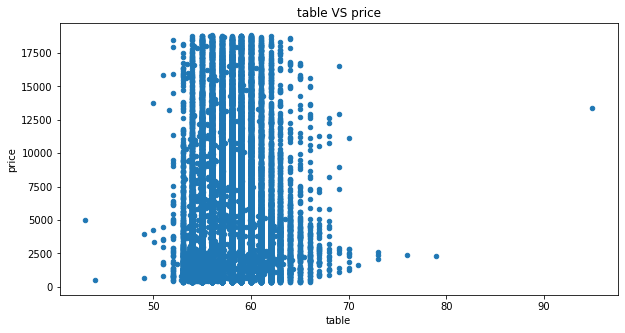

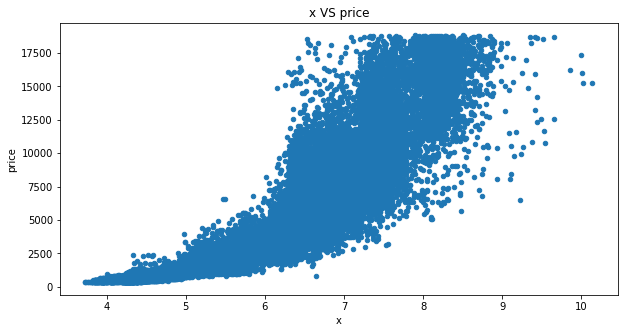

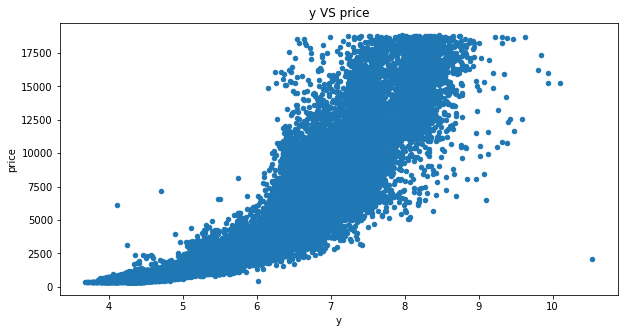

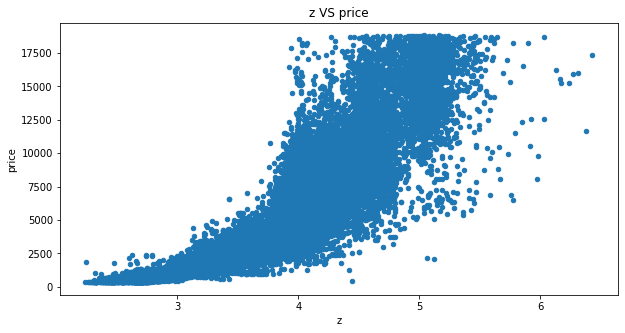

In [32]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    DiamondpricesData.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

In [33]:
# Calculating correlation matrix
ContinuousCols=['price','carat', 'depth', 'table', 'x','y','z']

# Creating the correlation matrix
CorrelationData=DiamondpricesData[ContinuousCols].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921845,-0.011424,0.126696,0.887063,0.888460,0.882354
carat,0.921845,1.000000,0.027212,0.181277,0.978136,0.977011,0.977179
depth,-0.011424,0.027212,1.000000,-0.297608,-0.025531,-0.028635,0.095916
table,0.126696,0.181277,-0.297608,1.000000,0.195519,0.189201,0.154926
x,0.887063,0.978136,-0.025531,0.195519,1.000000,0.998435,0.991574
y,0.888460,0.977011,-0.028635,0.189201,0.998435,1.000000,0.991271
z,0.882354,0.977179,0.095916,0.154926,0.991574,0.991271,1.000000


In [34]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['price'][abs(CorrelationData['price']) > 0.2 ]

price    1.000000
carat    0.921845
x        0.887063
y        0.888460
z        0.882354
Name: price, dtype: float64

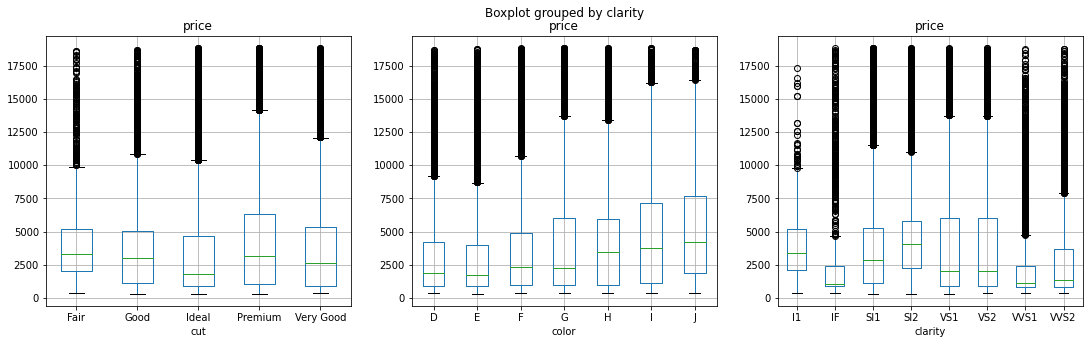

In [35]:
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    DiamondpricesData.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [36]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [37]:
SelectedColumns=['carat', 'x','y','z','cut', 'color', 'clarity']

# Selecting final columns
DataForML=DiamondpricesData[SelectedColumns]
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2


In [38]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [39]:
# Looking at unique values of ordinal column
DataForML['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [40]:
# Replacing the ordinal values
DataForML['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)

In [41]:
# Looking at unique values of ordinal column
DataForML['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [42]:
# Replacing the ordinal values
DataForML['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [43]:
# Looking at unique values of ordinal column
DataForML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [44]:
# Replacing the ordinal values
DataForML['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

In [45]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['price']=DiamondpricesData['price']

# Printing sample rows
DataForML_Numeric.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,4,6,3,326
1,0.21,3.89,3.84,2.31,5,6,2,326
2,0.23,4.05,4.07,2.31,1,6,4,327
3,0.29,4.20,4.23,2.63,5,2,5,334
4,0.31,4.34,4.35,2.75,1,1,3,335


In [46]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [47]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [48]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37636, 7)
(37636,)
(16131, 7)
(16131,)


In [50]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=4)
R2 Value: 0.9851657974811846

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   4039          3422.0
1   3239          3310.0
2   6089          5906.0
3   9660          9823.0
4   2326          2538.0
Mean Accuracy on test data: 91.97696026007668
Median Accuracy on test data: 94.44199382443759

Accuracy values for 10-fold Cross Validation:
 [84.09429751 86.93775318 86.2052414  83.91565947 81.31511662 82.43757567
 83.89529592 83.11007518 83.66726245 84.49426444]

Final Average Accuracy of the model: 84.01


In [51]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['carat','y', 'color' , 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(53767, 4)
(53767,)


In [52]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Training the model on 100% Data available
Final_KNN_Model=RegModel.fit(X,y)

In [53]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_KNN_Model, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [83.98398157 86.88447515 86.3078534  83.83250964 81.4472221  80.44042237
 82.61553547 82.84644844 83.92036113 84.2092423 ]

Final Average Accuracy of the model: 83.65


In [54]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_KNN_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_KNN_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: d:\KISHAN COLLAGE\all projects\Diamond Price Prediction
